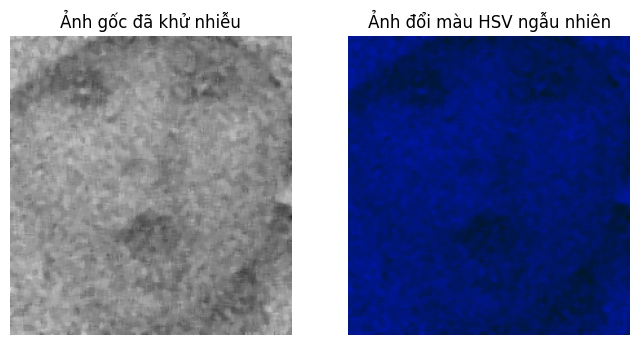

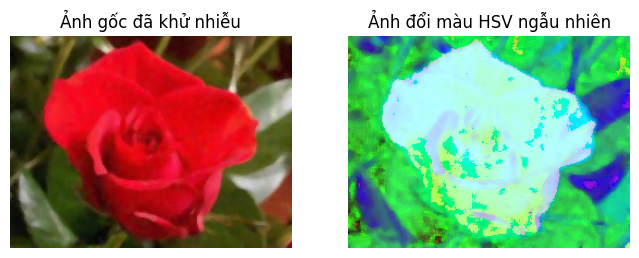

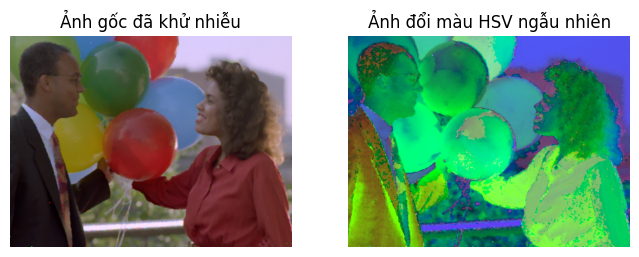

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import random

# Lấy danh sách các file ảnh trong thư mục 
image_files = glob.glob("baby.jpeg") + glob.glob("flower.jpeg") + glob.glob("balloons_noisy.png")

for file in image_files:
    img = cv2.imread(file)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Khử nhiễu bằng median filter
    img_denoised = cv2.medianBlur(img, 5)
    # Chuyển sang không gian màu HSV
    img_hsv = cv2.cvtColor(img_denoised, cv2.COLOR_BGR2HSV)
    # Tạo giá trị ngẫu nhiên cho từng kênh HSV
    h_shift = random.randint(-100, 100)
    s_shift = random.randint(-100, 100)
    v_shift = random.randint(-100, 100)
    # Đổi màu từng kênh, đảm bảo giá trị nằm trong khoảng hợp lệ
    img_hsv = img_hsv.astype(np.int16)
    img_hsv[..., 0] = np.clip(img_hsv[..., 0] + h_shift, 0, 179)  # Hue: 0-179
    img_hsv[..., 1] = np.clip(img_hsv[..., 1] + s_shift, 0, 255)  # Saturation: 0-255
    img_hsv[..., 2] = np.clip(img_hsv[..., 2] + v_shift, 0, 255)  # Value: 0-255
    img_hsv = img_hsv.astype(np.uint8)

    # Hiển thị ảnh gốc và ảnh đã đổi màu HSV
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.title("Ảnh gốc đã khử nhiễu")
    plt.imshow(cv2.cvtColor(img_denoised, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.title("Ảnh đổi màu HSV ngẫu nhiên")
    plt.imshow(img_hsv)
    plt.axis('off')
    plt.show()